In [1]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5933.9/8062.4 GB disk)


In [6]:
from ultralytics import YOLO

from IPython.display import display, Image

### 💻 CLI

In [10]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="JPg4RXYyygk8aZ8ongXO")
project = rf.workspace("bilrein").project("bone-fracture-znzxd")
version = project.version(1)
dataset = version.download("yolov8")


/kaggle/working/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 34.4 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
jupyterlab 4.1.6 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-ls


Extracting Dataset Version Zip to Bone-Fracture-1 in yolov8:: 100%|██████████| 3224/3224 [00:00<00:00, 9495.77it/s]


## Custom Training

In [9]:
path="/kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8"

In [11]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=45 imgsz=640 plots=True

/kaggle/working
New https://pypi.org/project/ultralytics/8.3.15 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/datasets/Bone-Fracture-1/data.yaml, epochs=45, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, v

In [12]:
!ls {HOME}/runs/detect/train/

args.yaml  weights


/kaggle/working


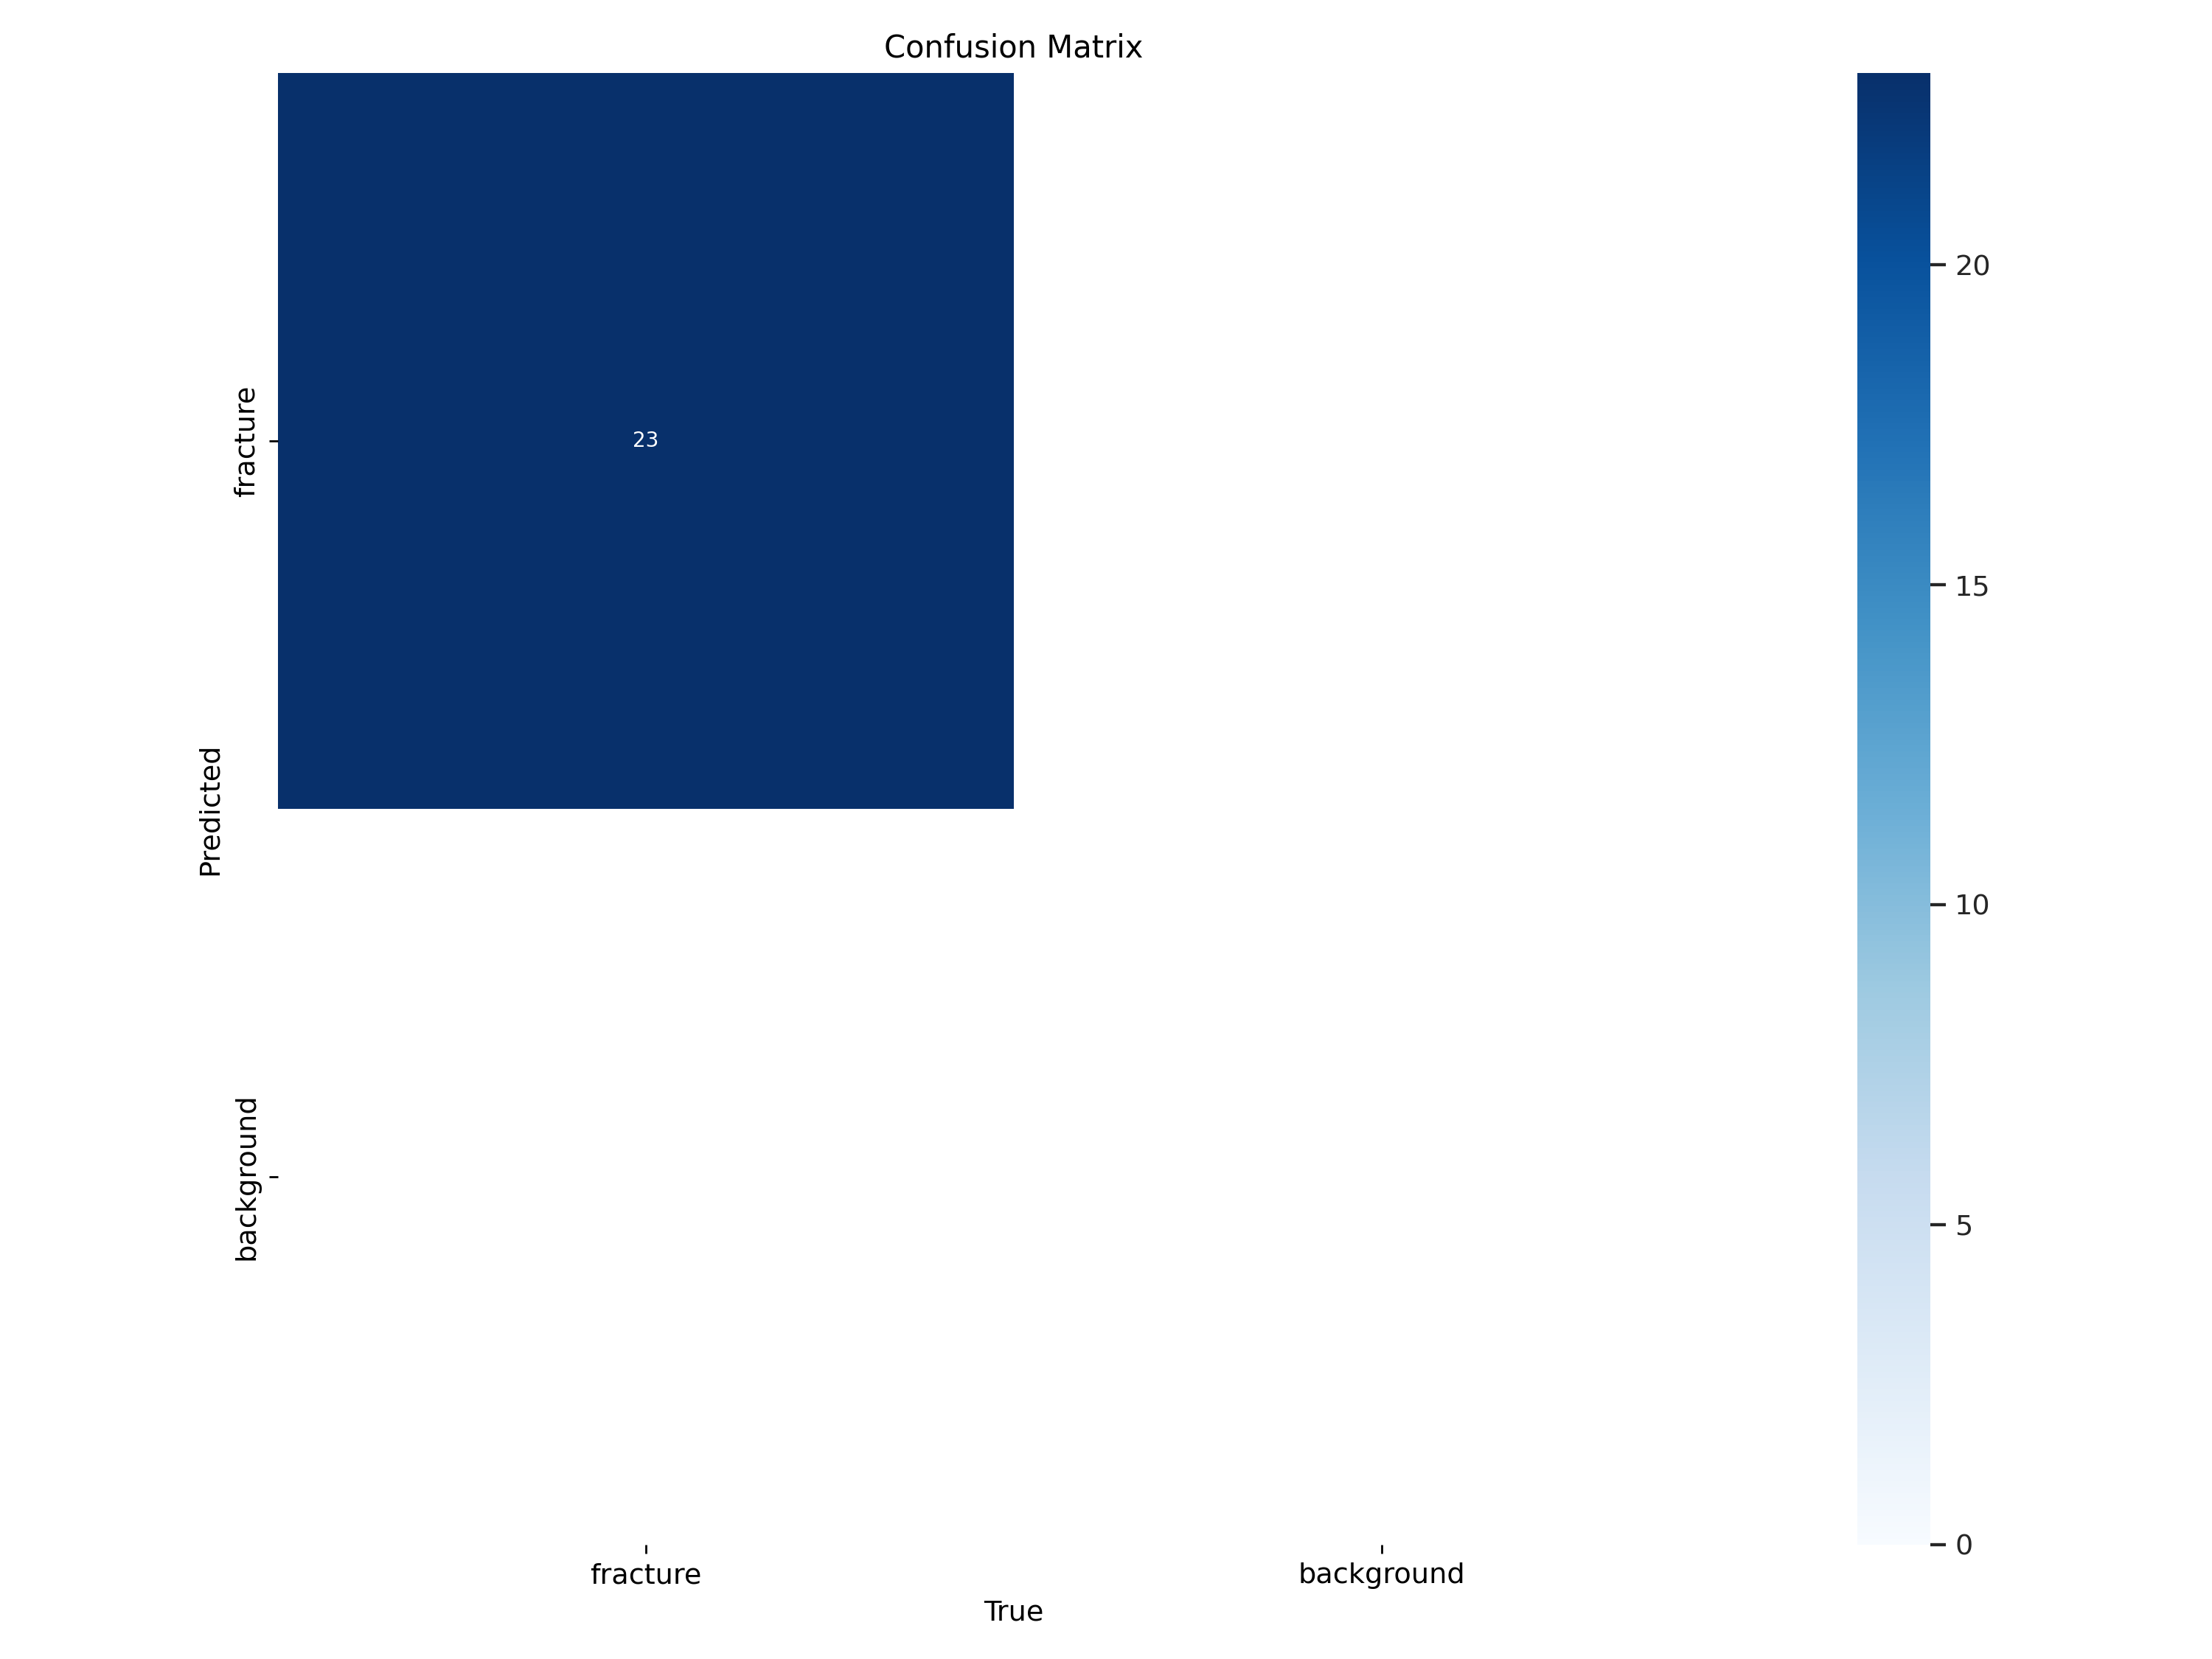

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=800)

/kaggle/working


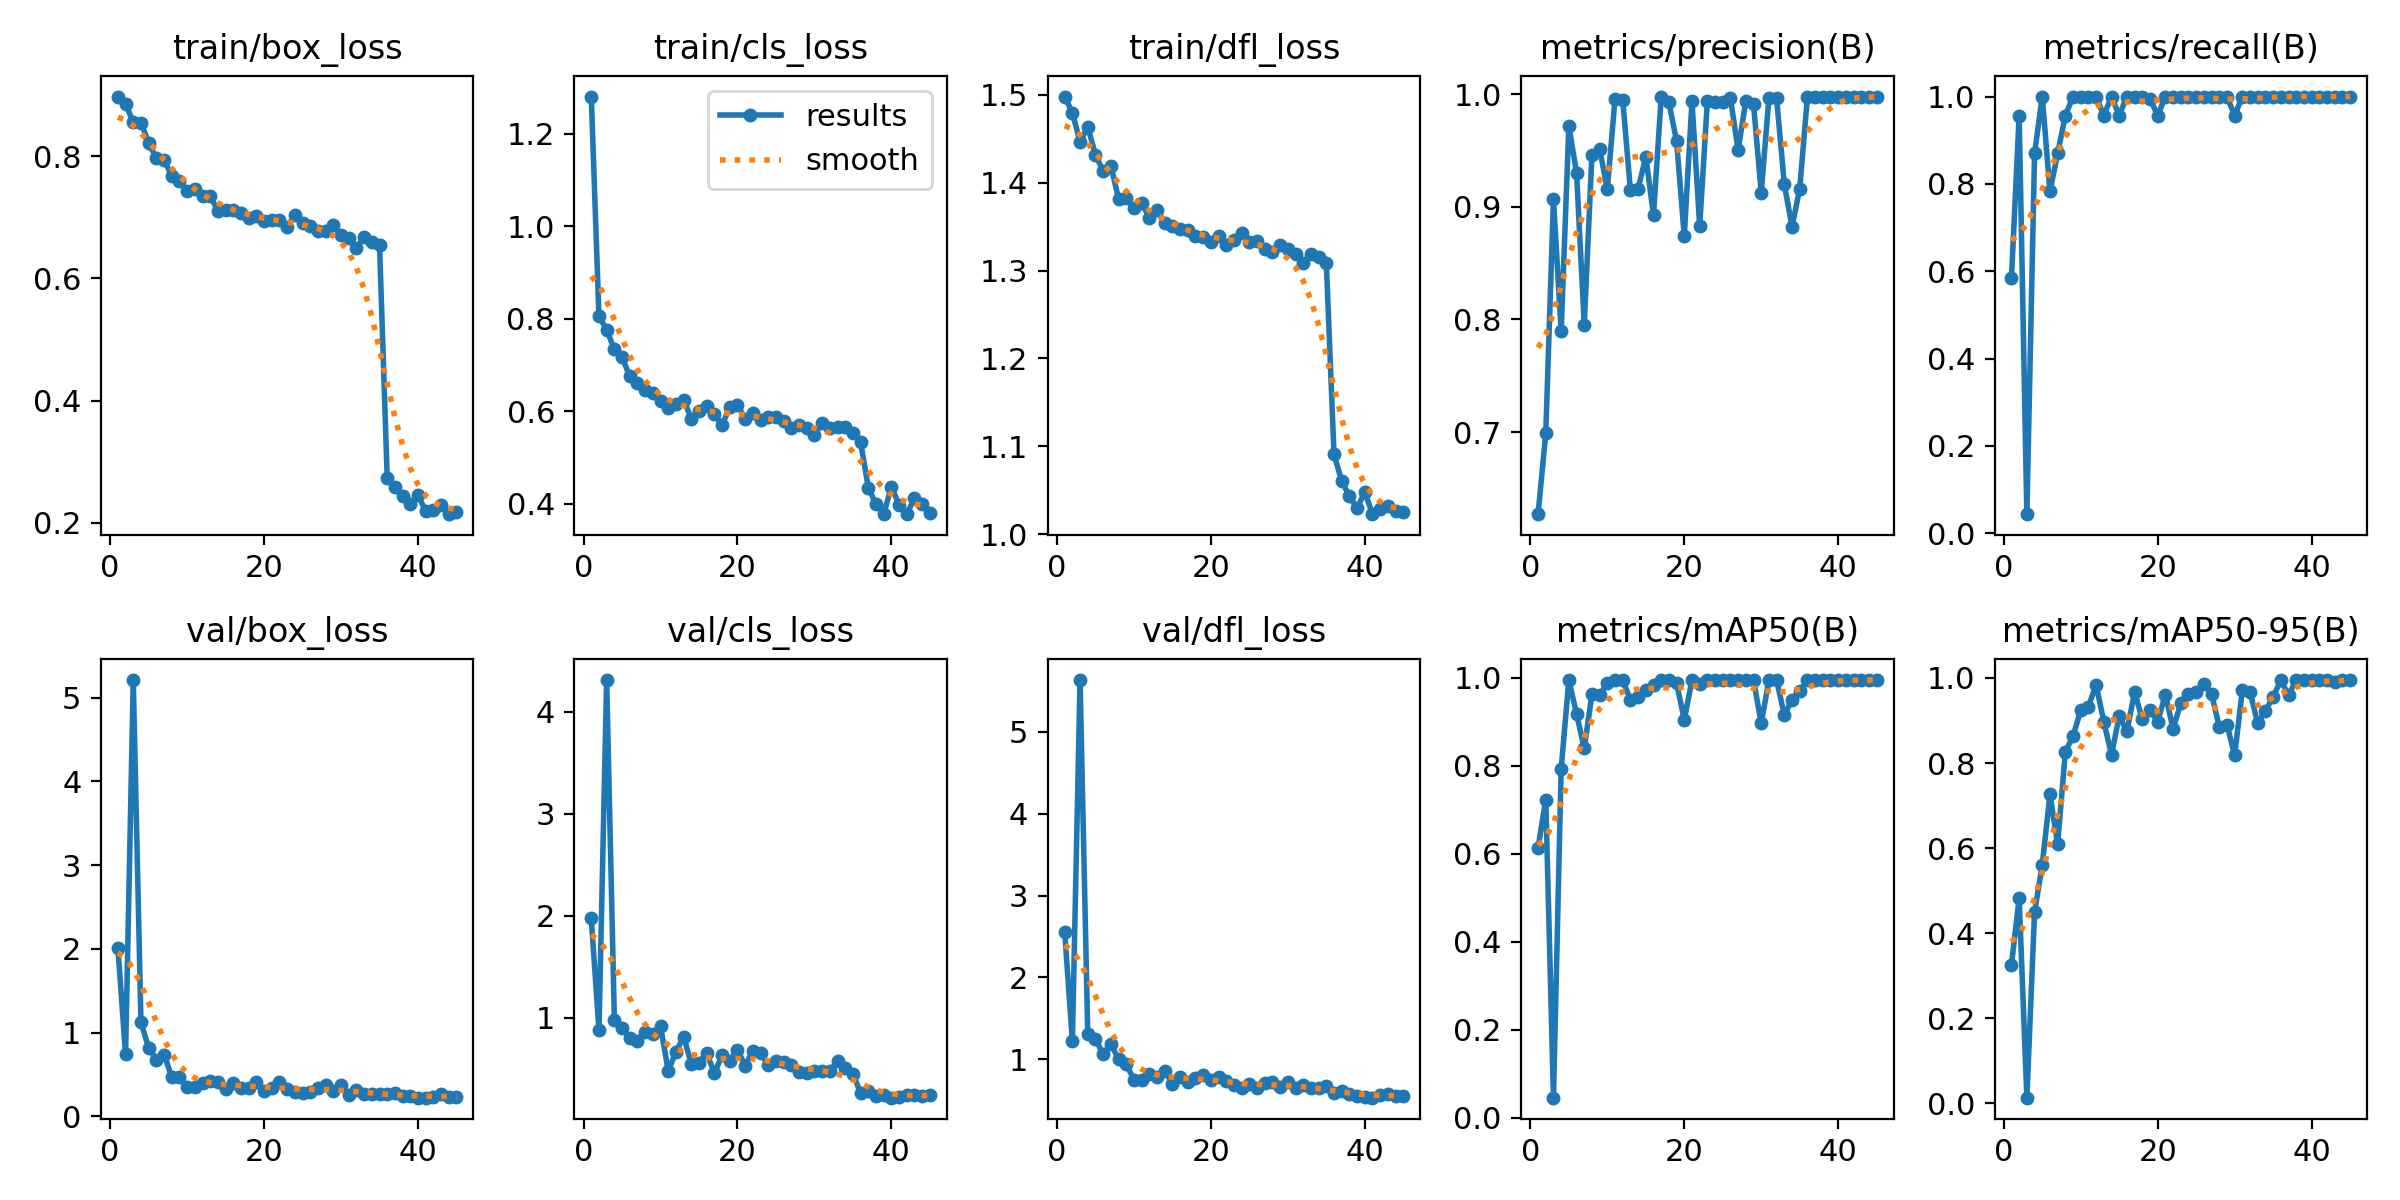

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=800)

/kaggle/working


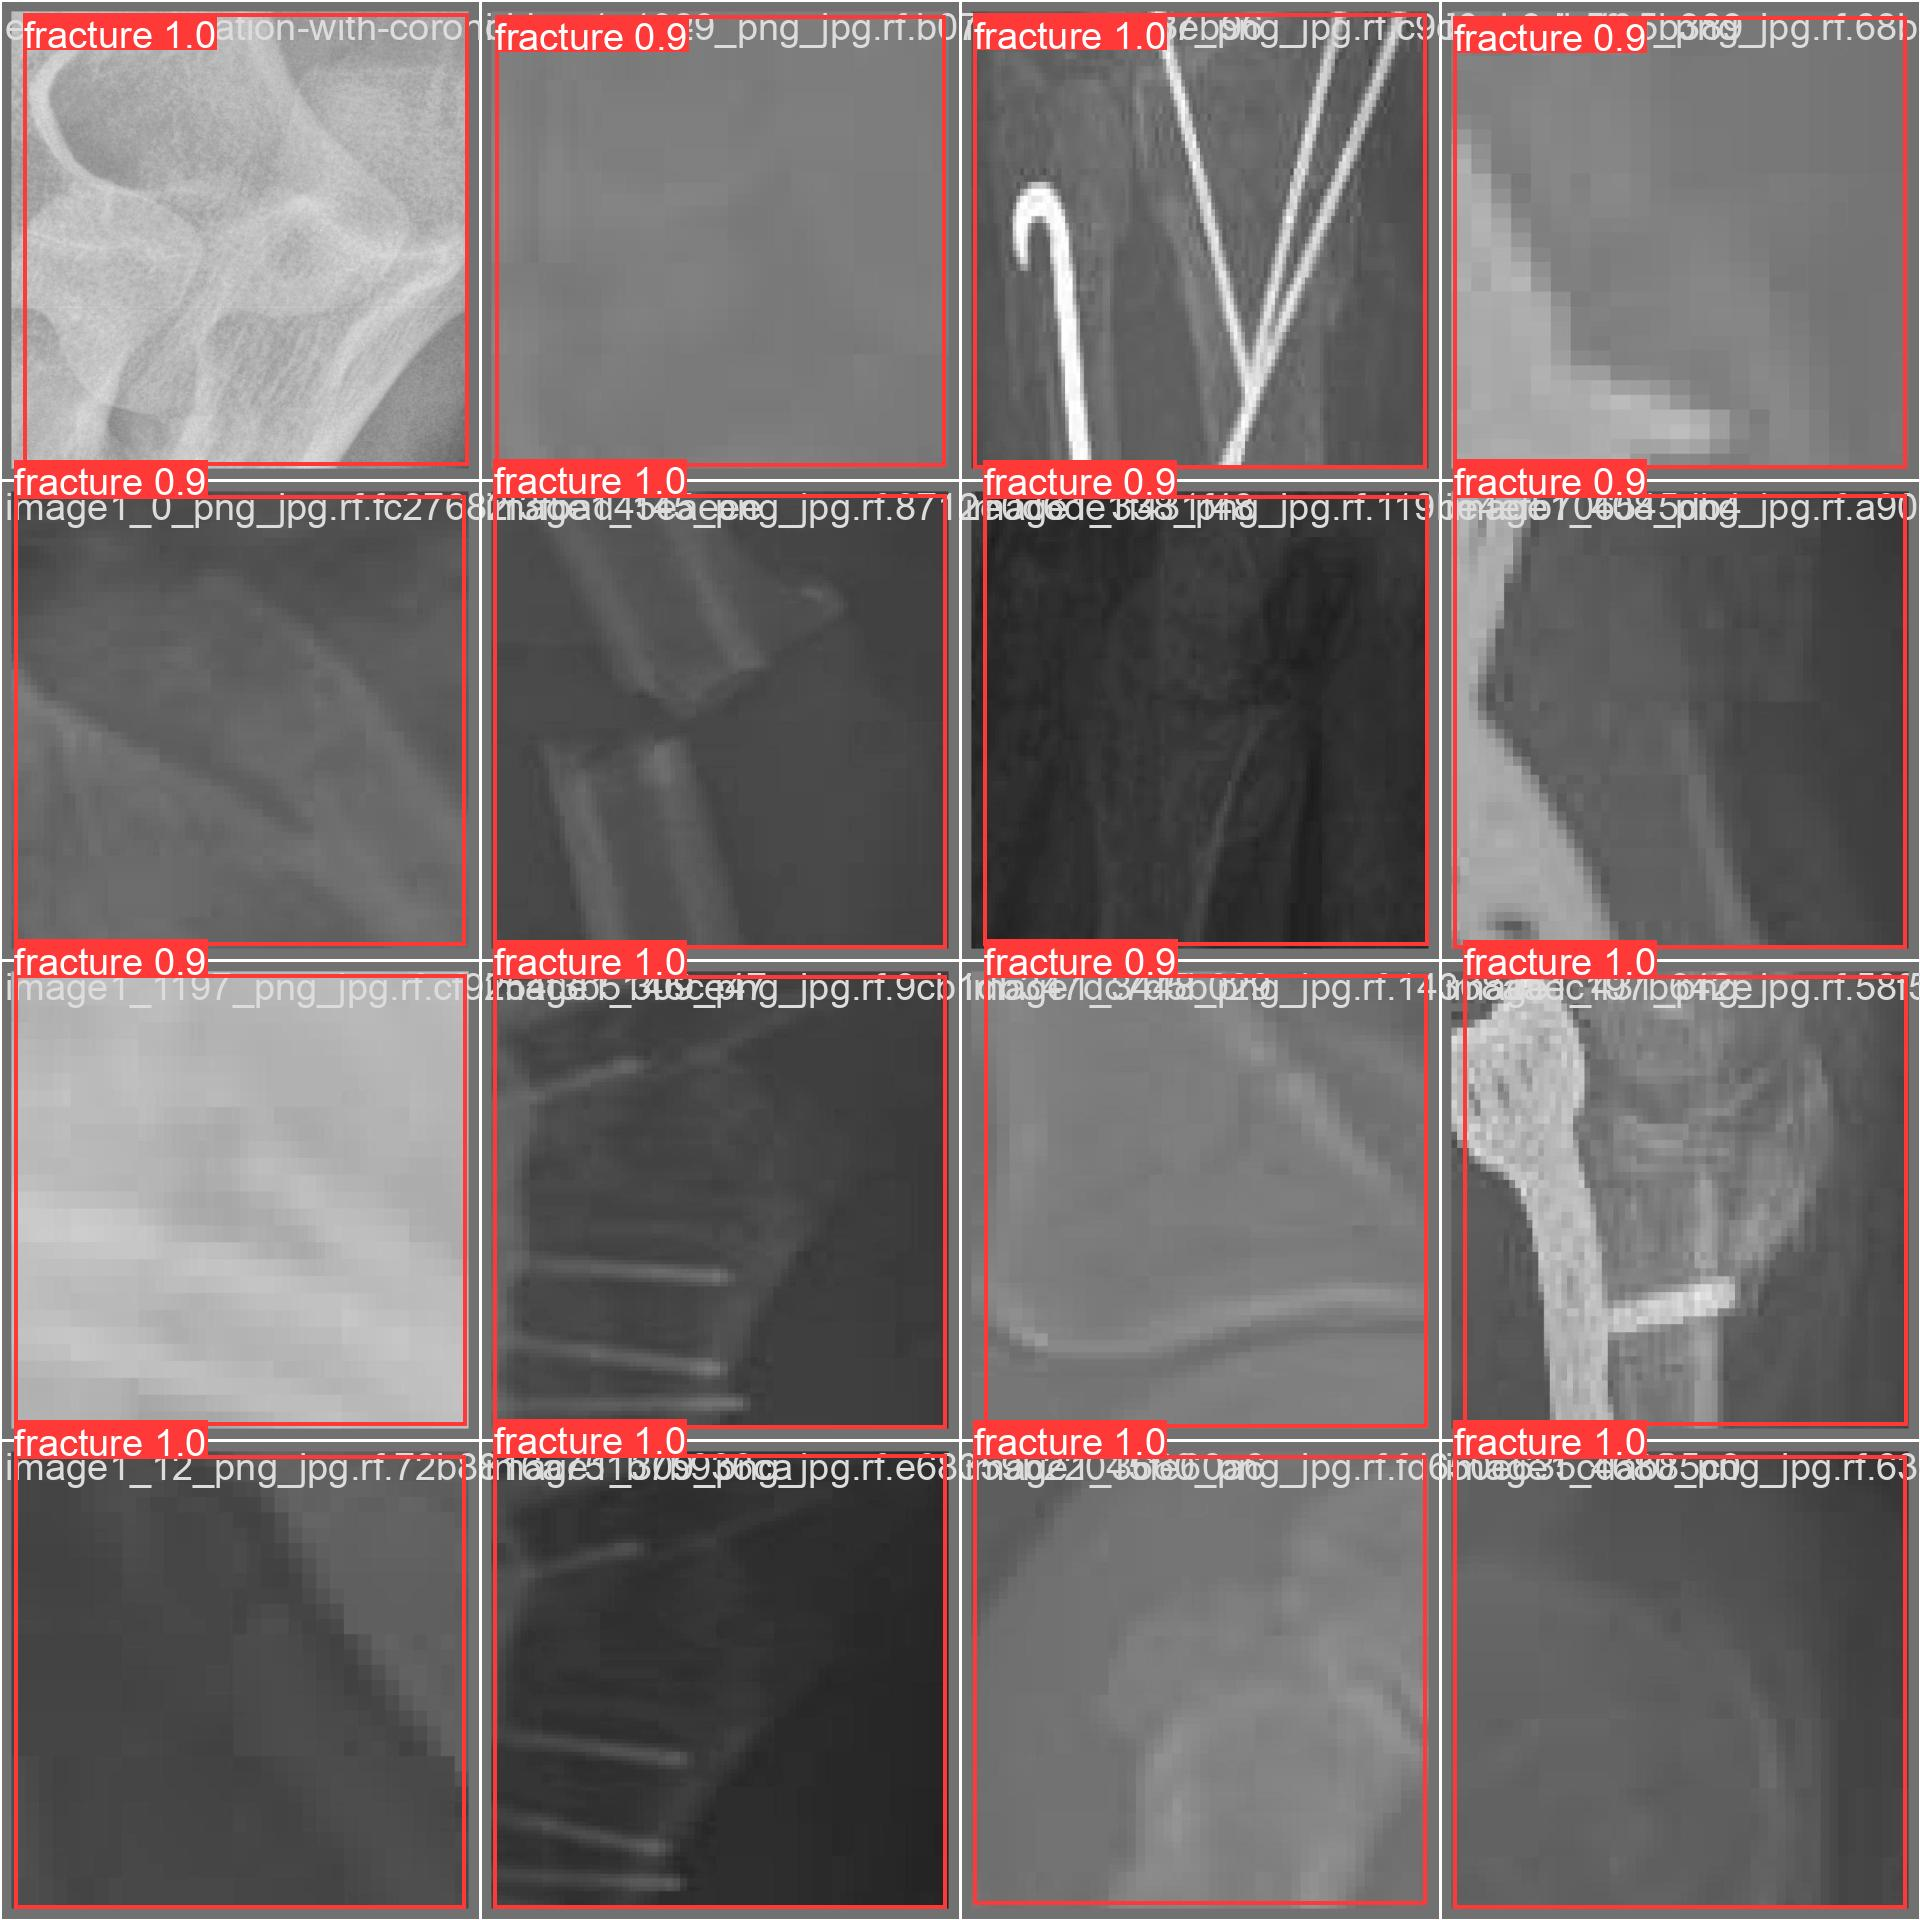

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=800)

## Validate Custom Model

In [21]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /kaggle/working/datasets/Bone-Fracture-1/valid/labels.cache... 23 
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         23         23      0.998          1      0.995      0.995
Speed: 3.9ms preprocess, 30.3ms inference, 0.0ms loss, 6.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [22]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/53 /kaggle/working/datasets/Bone-Fracture-1/test/images/fracture-of-the-humeral-capitellum-milch-type-1-1-1-_jpg.rf.a2651e72143b65e1a2495f6b6ffa4a72.jpg: 640x640 1 fracture, 16.4ms
image 2/53 /kaggle/working/datasets/Bone-Fracture-1/test/images/image1_1150_png_jpg.rf.bc25480ad2833416a0d1ce6f0e86e471.jpg: 640x640 1 fracture, 16.3ms
image 3/53 /kaggle/working/datasets/Bone-Fracture-1/test/images/image1_1159_png_jpg.rf.85332ad59d8202f52330bb0bd9d95676.jpg: 640x640 1 fracture, 16.2ms
image 4/53 /kaggle/working/datasets/Bone-Fracture-1/test/images/image1_1190_png_jpg.rf.57dae422bf4e9c96bb6014ffd083316d.jpg: 640x640 1 fracture, 16.2ms
image 5/53 /kaggle/working/datasets/Bone-Fracture-1/test/images/image1_1211_png_jpg.rf.2064a439be4ef1e439804fa81291bdc6.jpg: 640x640 1 fracture, 16.2ms
image 6/53 /kaggle/work

**NOTE:** Let's take a look at few results.

# Predict

In [ ]:
/kaggle/working/datasets/Bone-Fracture-1/train/images/image1_270_png_jpg.rf.f2ba6e4512e2cb14adeff1dff58ce263.jpg

In [25]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source=/kaggle/working/datasets/Bone-Fracture-1/train/images/image1_270_png_jpg.rf.f2ba6e4512e2cb14adeff1dff58ce263.jpg save=True

/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /kaggle/working/datasets/Bone-Fracture-1/train/images/image1_270_png_jpg.rf.f2ba6e4512e2cb14adeff1dff58ce263.jpg: 640x640 1 fracture, 16.4ms
Speed: 2.6ms preprocess, 16.4ms inference, 148.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
%cd {HOME}
Image(filename=f'/content/image2_535_png.rf.9f41f774922b827032200a54ddc7ad52.jpg', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'/content/runs/detect/predict6/image2_535_png.rf.9f41f774922b827032200a54ddc7ad52.jpg', width=600)

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/image1_4264_png.rf.9f86ff2a767b7c63763f3684a77ce30d.jpg save=True

In [ ]:
%cd {HOME}
Image(filename=f'/content/image1_4264_png.rf.9f86ff2a767b7c63763f3684a77ce30d.jpg', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'/content/runs/detect/predict3/image1_4264_png.rf.9f86ff2a767b7c63763f3684a77ce30d.jpg', width=600)

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/image2_1758_png.rf.be01737bb3e65525d2fcac4a9814624f.jpg save=True

In [ ]:
%cd {HOME}
Image(filename=f'/content/image2_1758_png.rf.be01737bb3e65525d2fcac4a9814624f.jpg', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'/content/runs/detect/predict5/image2_1758_png.rf.be01737bb3e65525d2fcac4a9814624f.jpg', width=600)